In [18]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
import seaborn as sns

import graphviz 
import pydotplus
import io
from scipy import misc 
import imageio


%matplotlib inline 

## SPOTIFY SONG ATTRIBUTES EDA
- Import Dataset
- EDA to visualize data and it's structure 
- Train a classifier (Decison tree)
- Predict Target using trained classifer 

In [2]:
data = pd.read_csv('data/data.csv')
type(data)

pandas.core.frame.DataFrame

In [3]:
# Generate Descriptive statistics
data.describe() 

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [4]:
# Grab first 5 rows or 'observations' of data
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [5]:
# Info on the columns or 'features' of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


In [6]:
# Split data to train one set and use the other set to test the trained data
train, test = train_test_split(data, test_size= 0.15)
testSize = len(test); trainSize = len(train)
print(f"Train Size is: {trainSize}; Test Size is: {testSize}") 

Train Size is: 1714; Test Size is: 303


In [7]:
# change color pallete 
red_blue = ["#19B5FE", "#EF4836"]
pallete = sns.color_palette(red_blue)
sns.set_palette(pallete)
sns.set_style("white")

In [8]:
pos_tempo = data[data ['target']==1]['tempo'] 
neg_tempo = data[data ['target']==0]['tempo'] 

pos_acoustic = data[data ['target']==1]['acousticness'] 
neg_acoustic = data[data ['target']==0]['acousticness'] 

pos_dance = data[data ['target']==1]['danceability'] 
neg_dance = data[data ['target']==0]['danceability'] 

pos_duartion = data[data ['target']==1]['duration_ms'] 
neg_duration = data[data ['target']==0]['duration_ms'] 

pos_energy = data[data ['target']==1]['energy'] 
neg_energy = data[data ['target']==0]['energy'] 

pos_instrument = data[data ['target']==1]['instrumentalness'] 
neg_instument = data[data ['target']==0]['instrumentalness'] 

pos_key = data[data ['target']==1]['key'] 
neg_key = data[data ['target']==0]['key'] 

pos_liveness = data[data ['target']==1]['liveness'] 
neg_liveness = data[data ['target']==0]['liveness'] 

pos_loudness = data[data ['target']==1]['loudness'] 
neg_loudness = data[data ['target']==0]['loudness'] 

pos_speechiness = data[data ['target']==1]['speechiness'] 
neg_speechiness = data[data ['target']==0]['speechiness'] 

pos_valence = data[data ['target']==1]['valence'] 
neg_valence = data[data ['target']==0]['valence']  


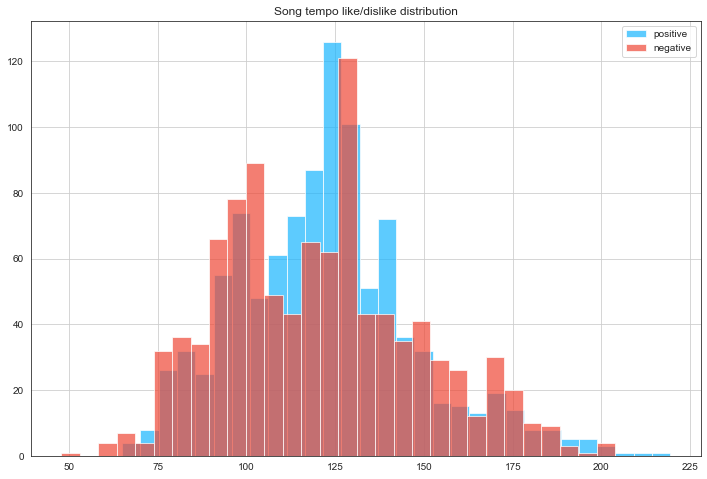

In [9]:
# figsize = (width,height) 
fig = plt.figure(figsize = (12,8))  

plt.title("Song tempo like/dislike distribution")

#alpha = color transparency, bins = amount of bars it'll split the data into 
pos_tempo.hist(alpha = 0.7, bins = 30, label = 'positive') 
neg_tempo.hist(alpha = 0.7, bins = 30, label = 'negative') 

#Location of legend 
plt.legend(loc = "upper right")

<AxesSubplot:title={'center':'Song Valence Like/Dislike Distribution'}, xlabel='Valence', ylabel='Count'>

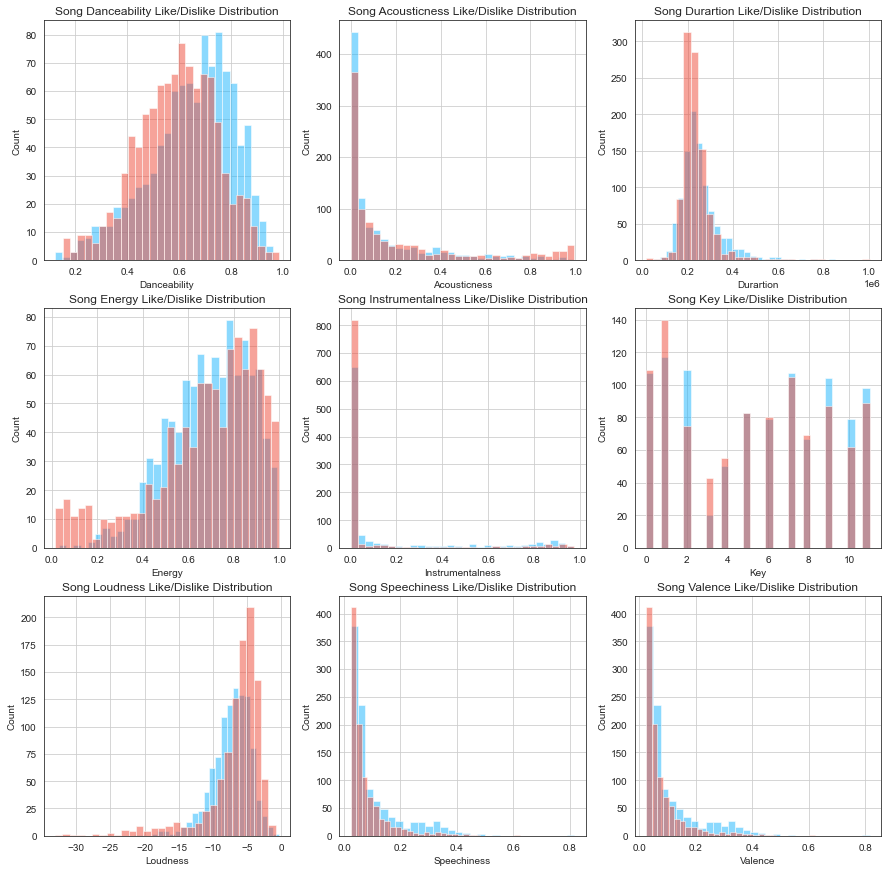

In [10]:
# Create Sub-Plots
fig2 = plt.figure(figsize=(15,15))

#Danceability 
ax3 = fig2.add_subplot(331)
ax3.set_xlabel("Danceability")
ax3.set_ylabel("Count")
ax3.set_title("Song Danceability Like/Dislike Distribution")
pos_dance.hist(alpha = 0.5, bins = 30)
neg_dance.hist(alpha=0.5, bins=30)

#Acousticness 
ax4 = fig2.add_subplot(332)
ax4.set_xlabel("Acousticness")
ax4.set_ylabel("Count")
ax4.set_title("Song Acousticness Like/Dislike Distribution")
pos_acoustic.hist(alpha = 0.5, bins = 30)
neg_acoustic.hist(alpha=0.5, bins=30)

#Durartion 
ax5 = fig2.add_subplot(333)
ax5.set_xlabel("Durartion")
ax5.set_ylabel("Count")
ax5.set_title("Song Durartion Like/Dislike Distribution")
pos_duartion.hist(alpha = 0.5, bins = 30)
neg_duration.hist(alpha=0.5, bins=30)

#Energy 
ax6 = fig2.add_subplot(334)
ax6.set_xlabel("Energy")
ax6.set_ylabel("Count")
ax6.set_title("Song Energy Like/Dislike Distribution")
pos_energy.hist(alpha = 0.5, bins = 30)
neg_energy.hist(alpha=0.5, bins=30)

#Instrumentalness 
ax7 = fig2.add_subplot(335)
ax7.set_xlabel("Instrumentalness")
ax7.set_ylabel("Count")
ax7.set_title("Song Instrumentalness Like/Dislike Distribution")
pos_instrument.hist(alpha = 0.5, bins = 30)
neg_instument.hist(alpha=0.5, bins=30)

#Key 
ax8 = fig2.add_subplot(336)
ax8.set_xlabel("Key")
ax8.set_ylabel("Count")
ax8.set_title("Song Key Like/Dislike Distribution")
pos_key.hist(alpha = 0.5, bins = 30)
neg_key.hist(alpha=0.5, bins=30)


#Loudness 
ax9 = fig2.add_subplot(337)
ax9.set_xlabel("Loudness")
ax9.set_ylabel("Count")
ax9.set_title("Song Loudness Like/Dislike Distribution")
pos_loudness.hist(alpha = 0.5, bins = 30)
neg_loudness.hist(alpha=0.5, bins=30)

#Speechiness 
ax10 = fig2.add_subplot(338)
ax10.set_xlabel("Speechiness")
ax10.set_ylabel("Count")
ax10.set_title("Song Speechiness Like/Dislike Distribution")
pos_speechiness.hist(alpha = 0.5, bins = 30)
neg_speechiness.hist(alpha=0.5, bins=30)

#Valence 
ax11 = fig2.add_subplot(339)
ax11.set_xlabel("Valence")
ax11.set_ylabel("Count")
ax11.set_title("Song Valence Like/Dislike Distribution")
pos_speechiness.hist(alpha = 0.5, bins = 30)
neg_speechiness.hist(alpha=0.5, bins=30)

In [11]:
# min_sample_split is better to keep at a higher num
# A lower min_sample_size will make the algorithm too dense and won't predict as well when new data is presented. 
classifier = DecisionTreeClassifier(min_samples_split=100)

In [12]:
features = ["danceability", "acousticness", "duration_ms", "energy", "instrumentalness", "key", "loudness", "speechiness", "valence"]

In [13]:
x_train = train[features]
y_train = train["target"]

x_test = test[features]
y_test = test["target"]


In [14]:
dt = classifier.fit(x_train, y_train)

In [19]:
# Use Graphviz to visualize tree 

def show_tree(t, features, path):
    f = io.StringIO()
    tree.export_graphviz(t, out_file=f, feature_names=features)
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img = imageio.imread(path)
    plt.rcParams["figure.figsize"] = (20,20)
    plt.imshow(img)
    

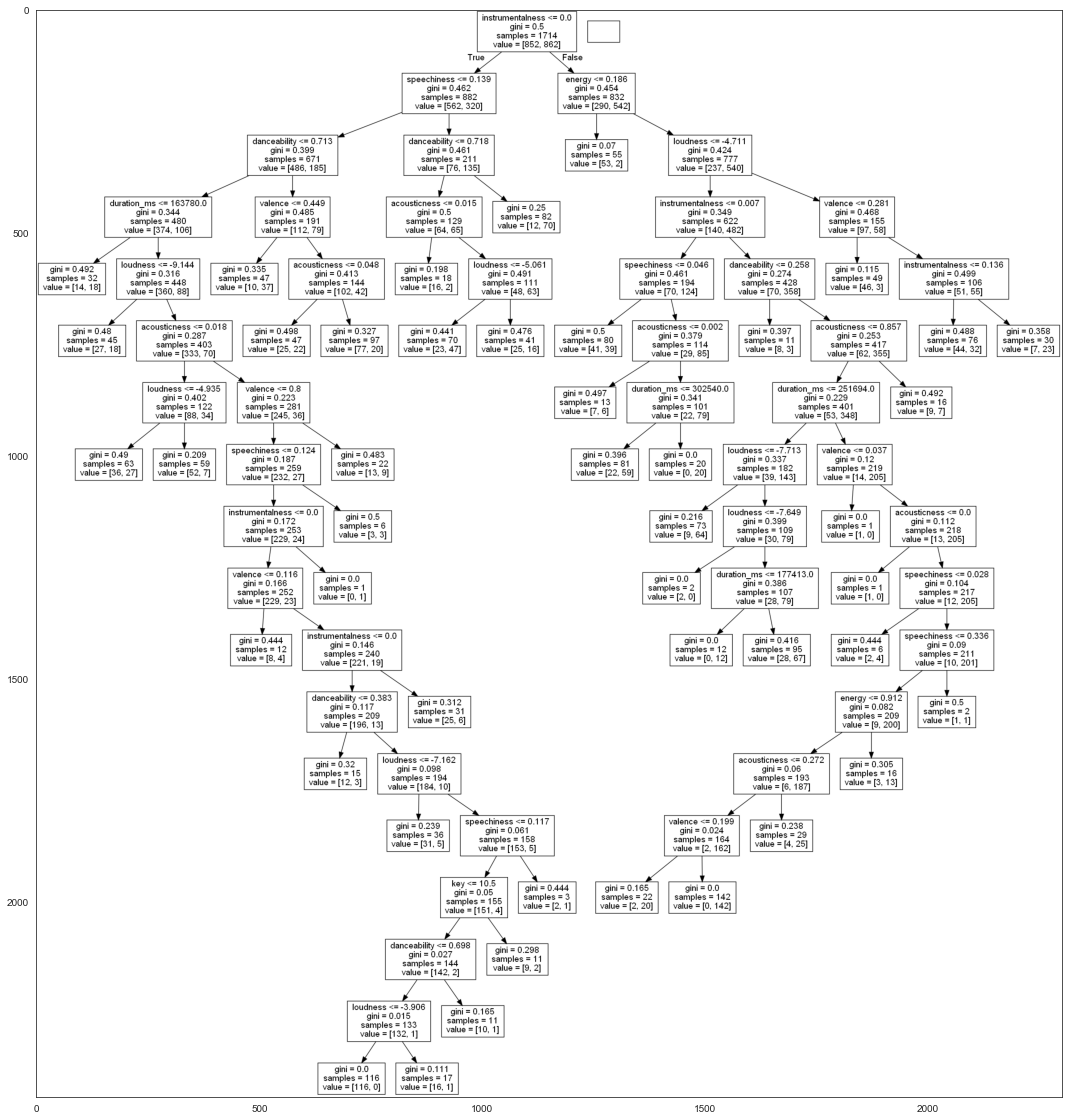

In [20]:
show_tree(dt, features, 'dec_tree_01.png')

In [21]:
y_pred = classifier.predict(x_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [23]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, y_pred) * 100 
print("Accuracy using Decision Tree: ", round(score,1), "%") 

Accuracy using Decision Tree:  72.3 %
